In [ ]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/covid_only.xlsx')

In [ ]:
data1 = data.sample(frac=1)

In [ ]:
data.head()

,id,type,fact_check_url,news_url,title,content,Label
0,0.0,post,https://factcheck.afp.com/false-advice-refusin...,https://www.facebook.com/photo.php?fbid=551960...,Facebook posts shared in at least three countr...,NaN,fake
1,1.0,article,https://www.politifact.com/factchecks/2020/apr...,http://legis.wisconsin.gov/assembly/republican...,Wisconsin is Òclearly seeing a decline in COVI...,speaker robin vos r rochester and senate major...,fake
2,2.0,post,https://factcheck.afp.com/posts-claim-children...,https://www.facebook.com/iAmJessenia/photos/a....,Facebook posts claim a child who is infected w...,NaN,fake
3,3.0,post,https://checkyourfact.com/2020/04/20/fact-chec...,https://www.facebook.com/kokernagnews/photos/a...,IndiaÕs Ministry of Home Affairs banning citiz...,NaN,fake
4,5.0,post,https://checkyourfact.com/2020/04/20/fact-chec...,https://www.facebook.com/photo.php?fbid=102193...,"42 Democratic senators, plus two Independents,...",NaN,fake


In [ ]:
data1.head()

,id,type,fact_check_url,news_url,title,content,Label
96,110.0,NaN,https://www.washingtonpost.com/politics/2020/0...,NaN,President Trump has repeatedly touted the anti...,NaN,fake
2714,1784.0,article,sciencedaily.com,https://www.sciencedaily.com/releases/2020/05/...,Pangolins May Possess Evolutionary Advantage A...,NaN,real
4391,3437.0,article,cdc.gov,https://www.cdc.gov/coronavirus/2019-ncov/php/...,Scaling Up Staffing Roles in Case Investigatio...,successful case investigation and contact trac...,real
3853,2899.0,article,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/covi...,COVID-19: Over 80% of young people may show no...,all data and statistics are based on publicly ...,real
2368,1473.0,article,who.int,https://www.who.int/news-room/commentaries/det...,"""Bacille Calmette-Guérin (BCG) vaccination and...",there is no evidence that the bacille calmette...,real


In [ ]:
data.shape

(4505, 7)

In [ ]:
data1.shape

(4505, 7)

In [ ]:
data1.isnull().sum()

id                  1
type               43
fact_check_url      0
news_url           43
title               0
content           924
Label               0
dtype: int64

In [ ]:
data1 = data1.dropna()

In [ ]:
data1.isnull().sum()

id                0
type              0
fact_check_url    0
news_url          0
title             0
content           0
Label             0
dtype: int64

In [ ]:
data1.shape

(3581, 7)

In [ ]:
clean_news = data1.copy()

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
clean_news['content']=clean_news['content'].apply(lambda x:review_cleaning(x))
clean_news.head()

,id,type,fact_check_url,news_url,title,content,Label
4391,3437.0,article,cdc.gov,https://www.cdc.gov/coronavirus/2019-ncov/php/...,Scaling Up Staffing Roles in Case Investigatio...,successful case investigation and contact trac...,real
3853,2899.0,article,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/covi...,COVID-19: Over 80% of young people may show no...,all data and statistics are based on publicly ...,real
2368,1473.0,article,who.int,https://www.who.int/news-room/commentaries/det...,"""Bacille Calmette-Guérin (BCG) vaccination and...",there is no evidence that the bacille calmette...,real
758,809.0,post,https://leadstories.com/hoax-alert/2020/05/fac...,https://www.facebook.com/matinamatina/posts/10...,People should ignore guidelines to wear masks ...,see more of matina george on facebook,fake
1773,879.0,article,webmd.com,https://www.webmd.com/lung/news/20200402/a-dec...,A Decade of Telemedicine Policy Has Advanced i...,the rapid spread of forced seemal desai md to...,real


In [ ]:
clean_news['title']=clean_news['title'].apply(lambda x:review_cleaning(x))

In [ ]:
import nltk

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')

In [ ]:
clean_news['content'] = clean_news['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,id,type,fact_check_url,news_url,title,content,Label
4391,3437.0,article,cdc.gov,https://www.cdc.gov/coronavirus/2019-ncov/php/...,scaling up staffing roles in case investigatio...,successful case investigation contact tracing ...,real
3853,2899.0,article,medicalnewstoday.com,https://www.medicalnewstoday.com/articles/covi...,over of young people may show no symptoms,data statistics based publicly available data ...,real
2368,1473.0,article,who.int,https://www.who.int/news-room/commentaries/det...,bacille calmetteguérin bcg vaccination and,evidence bacille calmette gurin vaccine bcg pr...,real
758,809.0,post,https://leadstories.com/hoax-alert/2020/05/fac...,https://www.facebook.com/matinamatina/posts/10...,people should ignore guidelines to wear masks ...,see matina george facebook,fake
1773,879.0,article,webmd.com,https://www.webmd.com/lung/news/20200402/a-dec...,a decade of telemedicine policy has advanced i...,rapid spread forced seemal desai md make excru...,real


In [ ]:
clean_news['title'] = clean_news['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

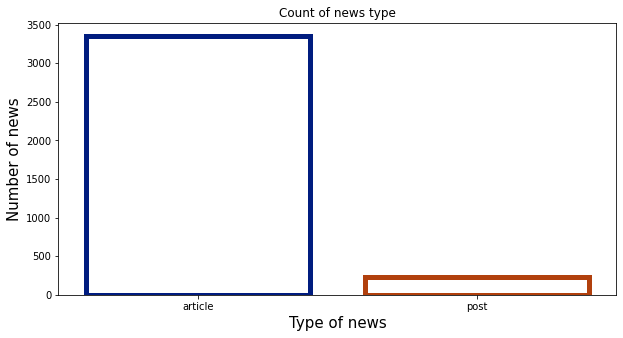

In [ ]:
ax = sns.countplot(x="type", data=clean_news,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

#Setting labels and font size
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

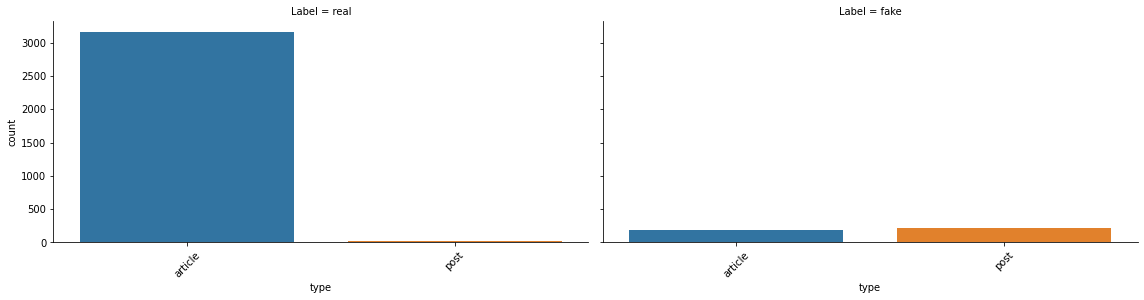

In [ ]:
g = sns.catplot(x="type", col="Label",
                data=clean_news, kind="count",
                height=4, aspect=2)

#Rotating the xlabels
g.set_xticklabels(rotation=45)

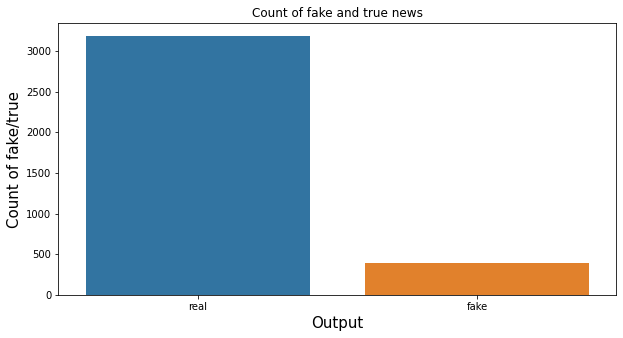

In [ ]:
ax=sns.countplot(x="Label", data=clean_news)

#Setting labels and font size
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

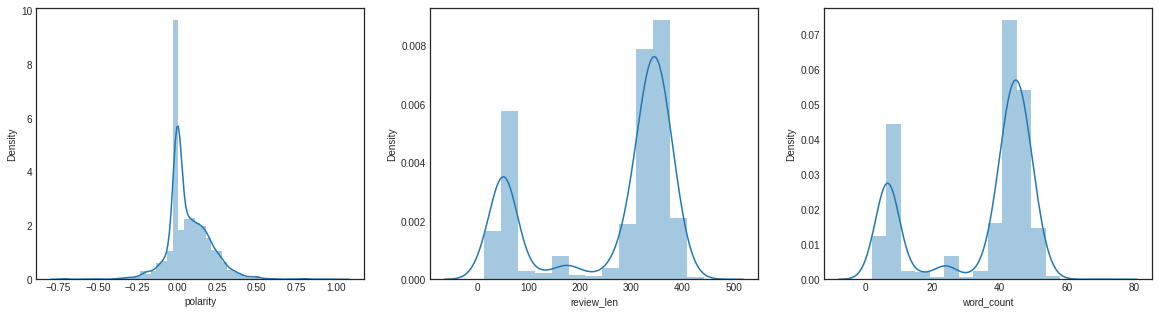

In [ ]:
#Extracting the features from the news
clean_news['polarity'] = clean_news['content'].map(lambda text: TextBlob(text).sentiment.polarity)
clean_news['review_len'] = clean_news['content'].astype(str).apply(len)
clean_news['word_count'] = clean_news['content'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(clean_news['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(clean_news['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(clean_news['word_count'])
fig = plt.gcf()

In [ ]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['content'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)
    
#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['content' , 'count'])

#Group by words and plot the sum
df1.groupby('content').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='blue', title='Top 20 words in news')
plt.show()

coronavirus 1320
people 1267
health 1088
may 1014
data 952
new 905
disease 797
protect 787
using 740
online 730
information 688
service 686
website 671
pandemic 669
security 654
virus 645
attacks 643
cdc 587
time 578
based 540


In [ ]:
df1

,content,count
0,coronavirus,1320
1,people,1267
2,health,1088
3,may,1014
4,data,952
5,new,905
6,disease,797
7,protect,787
8,using,740
9,online,730


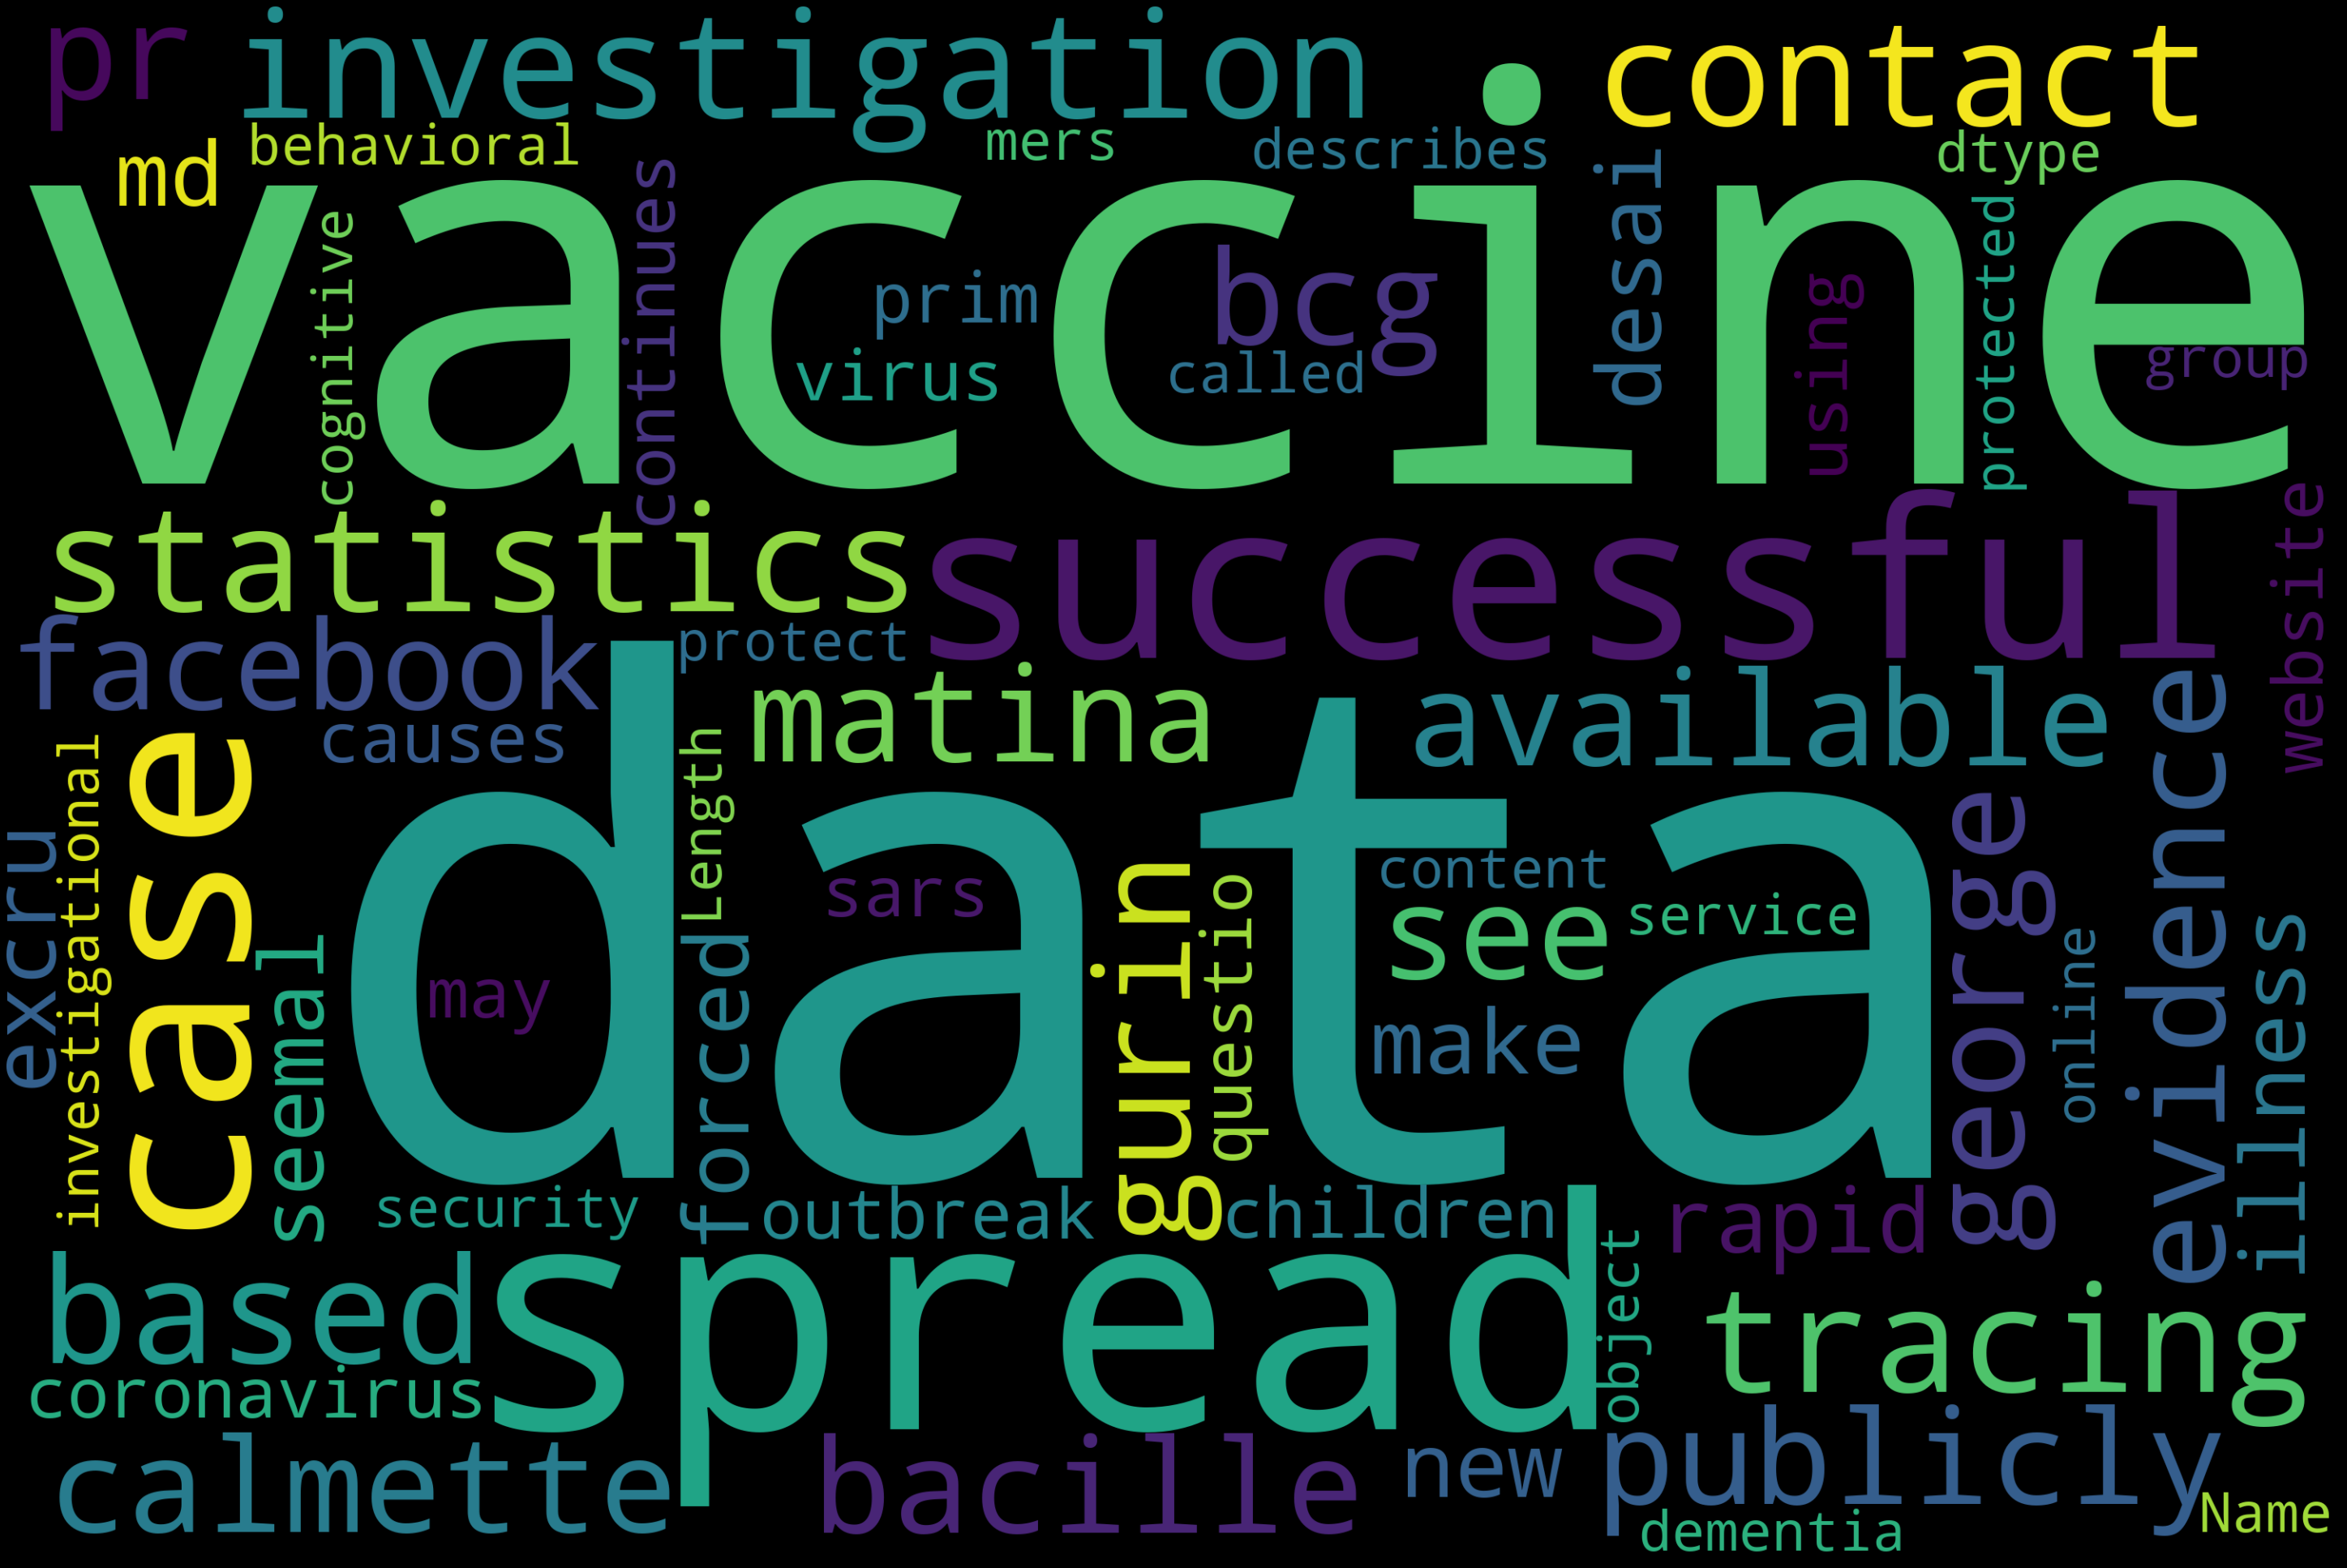

In [ ]:
text = clean_news["content"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
[#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['content']].reset_index(drop=True)
news_features.head()

,content
0,speaker robin vos r rochester senate majority ...
1,page looking
2,contrary narrative pushed mainstream covid vir...
3,programming alert exclusive documentary origin...
4,buffalo ny wivbmayor byron brown handing masks...


In [ ]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['content'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)   

In [ ]:
corpus[3500]

'document provid summari consider current center diseas control prevent cdc recommend regard test healthcar personnel hcp sar document appli individu meet definit hcp defin cdc recommend sar test develop base current known subject chang addit inform becom avail test hcp co'

In [ ]:
news_features.shape

(3581, 1)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=30000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['content'])
X.shape

(3581, 30000)

In [ ]:
news_features

,content
0,speaker robin vos r rochester senate majority ...
1,page looking
2,contrary narrative pushed mainstream covid vir...
3,programming alert exclusive documentary origin...
4,buffalo ny wivbmayor byron brown handing masks...
...,...
3576,never seen anything like plus years medicine u...
3577,must read click view convention navigation tip...
3578,sorry page looking found page may moved may mi...
3579,detected javascript disabled browser would lik...


In [ ]:
clean_news['Label'].unique()

array(['fake', 'real'], dtype=object)

In [ ]:
clean_news['Label'] = clean_news['Label'].replace({'fake': 0, 'real': 1})

In [ ]:
y=clean_news['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=0)

In [ ]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9028244191655903
Decision Tree Test Accuracy: 0.8827119092451099
KNN Test Accuracy: 0.33069435583013024
Naive Bayes Test Accuracy: 0.7288339739499852


In [ ]:



logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 14,  85],
       [  1, 796]])